In [1]:
import os
import numpy as np
from IPython.display import HTML

from HMM import unsupervised_HMM
from HMM_helper import (
    text_to_wordcloud,
    states_to_wordclouds,
    parse_observations,
    sample_sentence,
    visualize_sparsities,
    animate_emission, 
    obs_map_reverser
)

In [8]:
# using HMM implementation from HW 6

### Data Processing Notes 
* lowercase all words
* split lines into lists (singular sequence as a line in the poem)
* remove / ignore punctuation 
* 

* try entire sonnet as a sequence. 

In [2]:
text = open(os.path.join(os.getcwd(), 'data/shakespeare.txt')).read()

In [10]:
text[0:300]

"                   1\nFrom fairest creatures we desire increase,\nThat thereby beauty's rose might never die,\nBut as the riper should by time decease,\nHis tender heir might bear his memory:\nBut thou contracted to thine own bright eyes,\nFeed'st thy light's flame with self-substantial fuel,\nMaking a fam"

In [3]:
obs, obs_map = parse_observations(text)

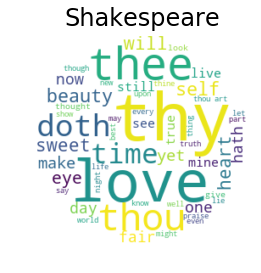

In [12]:
wordcloud = text_to_wordcloud(text, title='Shakespeare')

In [ ]:
# 10 states, 100 iterations 

In [67]:
obs;

In [40]:
hmm10 = unsupervised_HMM(obs, 10, 1)

In [41]:
print('Sample Sentence:\n====================')
print(sample_sentence(hmm10, obs_map, n_words=25))

Sample Sentence:
This me lions mad disgrace may with you happy yet and use your act they thou and love not impair buried muse sight be unless...


In [ ]:
# print sample poem 

In [18]:
# turn lines = sequences -> sonnet=sequeces 

sonnets = [] # initialize list for containing all sonnet sequences
current_sonnet = [] 

for line in obs:
    if len(line)==1: # beginning of a sonnet (number)
        sonnets.append(line) # new obs for each number (to match obs map)
        current_sonnet = [] # initialize new empty list for new sonnet sequence
        pass
    
    elif len(line)!=1:
        current_sonnet.extend(line) # add new line to sonnet
    sonnets.append(current_sonnet) # add previous sonnet to list of all sonnet sequences
        


In [22]:
hmm11 = unsupervised_HMM(sonnets, 10, 1)

In [24]:
print('Sample Sentence:\n====================')
print(sample_sentence(hmm11, obs_map, n_words=25))

Sample Sentence:
So me for in found world when i clears my times and others make wood my all and in thee went to liquid not wilt...


In [27]:
# mean number of words/ sonnet 

mean_word_array = np.full(len(sonnets), np.nan)
for i in range(len(sonnets)):
    mean_word_array[i] = len(sonnets[i])
    
print(np.mean(mean_word_array))

107.11205846528624


Make each sonnet 108 divided by 14 lines

In [78]:
def sample_sonnet(hmm, obs_map, n_words=112):
    # Get reverse map.
    obs_map_r = obs_map_reverser(obs_map)

    
    emission, states = hmm.generate_emission(n_words)
    
    line_iter = [0, 8, 16, 24, 32, 40, 48, 56, 64, 72, 80, 88, 96, 104, 112]
    
    for i in range(len(line_iter[:-1])):
        
        stanza_num = emission[line_iter[i]:line_iter[i+1]]
        stanza_word = [obs_map_r[k] for k in stanza_num]
        print(' '.join(stanza_word))
    


#     return ' '.join(sentence).capitalize() + '...'

In [79]:
sample_sonnet(hmm11, obs_map, n_words=112)

open state of and that eyes see with
are first faults guides kind in purpose to
lodged to guilty land behold gone lusty know
neigh so the out she worths creation shall
and it the thine selfdoing thy time with
die loves a but necessary me more it
to o my mine with that esteeming thy
in lovekindling would fixed the good by and
all my song for have yet of with
thou not i is expense is thee twenty
honour sweet gust wear alloblivious which strangle errors
in themselves anticipate men gentle foes found a
that cannot lips took my thou will a
of is poor man of the unkindness this


In [80]:
hmm10_10 = unsupervised_HMM(sonnets, 10, 10)
sample_sonnet(hmm10_10, obs_map, n_words=112)

so gazers me art it so but is
at suffer showst down of so you heaven
you times why love injury votary and worse
each unions therefore more selfkilled should the lie
i yellow touches so blessings to not triumph
ill am untutored comes thou truth that pine
thy their of that necessary die long pay
a thee fair in time all that to
theirs fair compare foist all vainly canst of
on gavst on gavst not thee when doth
sight up being to shame in now see
since clock of instinct be accumulate then world
within for darkly their cure are earth brain
part not my despair think assistance from gold


In [ ]:
# looping through various number of state 

state_num = [1, 5, 15, 20, 30]

for i in state_num:
    hmm = unsupervised_HMM(sonnets, 10, 10)
    
    print('Sample Sonnet with ' + str(i) + 'number of hidden states:\n====================')
    sample_sonnet(hmm, obs_map, n_words=112)

Sample Sonnet with 1number of hidden states:
and it shall love art all on lie
of with on their flower i to incertainties
weep eye which and thine play had alone
kings devouring my the die now should side
what faith erred triumphant so by to to
comment hast as which perjured beautys shall thine
live left thee delivered departest to leave shadow
face again all was from had being that
did did how so mine often gave fear
love more to sweet where i on from
the i state cheeks now love thing night
o seemly self can picture beauteous he of
his night lip then on shall thy self
shalt which night tempteth sicken in by should
Sample Sonnet with 5number of hidden states:
is mine not are boundless 42 space to
thus make dies in you sin hers do
them from you upon is in hath name
is look is sick sight in book beloved
might wherever and to happy contrary flies is
parts my rarities his my if everywhere stands
then and onset learning who wise hate though
my absence whether weigh sickly is shouldst harder


How incorporate structure (14 lines), rhyme scheme, and iambic pentameter into HMM? 